<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/Keypoints.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/Keypoints.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/Keypoints.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/Keypoints.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


In [24]:
import fiftyone as fo
import fiftyone.zoo as foz


dataset = foz.load_zoo_dataset(
   "quickstart",
   dataset_name="skeletons",
)


session = fo.launch_app(dataset)

Dataset already downloaded
Loading 'quickstart'
 100% |█████████████████| 200/200 [2.6s elapsed, 0s remaining, 70.9 samples/s]       
Dataset 'skeletons' created



Could not connect session, trying again in 10 seconds



In [8]:
dataset.skeletons = {
    "points": fo.KeypointSkeleton(
        labels=[
            "left hand" "left shoulder", "right shoulder", "right hand",
            "left eye", "right eye", "mouth",
        ],
        edges=[[0, 1, 2, 3], [4, 5, 6]],
    )
}

dataset.save()

In [9]:
!export FIFTYONE_CVAT_USERNAME=""
!export FIFTYONE_CVAT_PASSWORD=""

In [11]:
ann_view = dataset.match_tags("annotate")
ann_view

Dataset:     skeletons
Media type:  image
Num samples: 1
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. MatchTags(tags=['annotate'], bool=True, all=False)

In [61]:
cvat = fo.utils.cvat.CVATBackend
cvat.delete_runs()

TypeError: Run.delete_runs() missing 1 required positional argument: 'samples'

In [12]:

# A unique identifer for this run
anno_key = "skeleton1"

# Upload the sample and launch CVAT
anno_results = ann_view.annotate(
    anno_key,
    label_field="points",
    label_type="keypoints",
    classes=["person"],
    launch_editor=True,
)

Computing metadata...
 100% |█████████████████████| 1/1 [153.3ms elapsed, 0s remaining, 6.5 samples/s] 
Uploading samples to CVAT...
Launching editor at 'http://localhost:8080/tasks/11/jobs/11'...


In [13]:
anno_results.get_status()

{'points': {11: {'name': 'FiftyOne_skeletons',
   'status': 'annotation',
   'assignee': None,
   'last_updated': '2023-09-12T21:02:48.590095Z',
   'jobs': {11: {'url': 'http://localhost:8080/api/jobs/11',
     'id': 11,
     'task_id': 11,
     'project_id': None,
     'assignee': None,
     'guide_id': None,
     'dimension': '2d',
     'bug_tracker': None,
     'status': 'annotation',
     'stage': 'annotation',
     'state': 'completed',
     'mode': 'annotation',
     'frame_count': 1,
     'start_frame': 0,
     'stop_frame': 0,
     'data_chunk_size': 72,
     'data_compressed_chunk_type': 'imageset',
     'created_date': '2023-09-12T21:00:49.860024Z',
     'updated_date': '2023-09-12T21:02:52.808816Z',
     'issues': {'url': 'http://localhost:8080/api/issues?job_id=11',
      'count': 0},
     'labels': {'url': 'http://localhost:8080/api/labels?job_id=11',
      'count': 1},
     'type': 'annotation',
     'organization': None}}}}}

In [14]:
result = ann_view.load_annotation_results(anno_key)
result.get_status()

{'points': {11: {'name': 'FiftyOne_skeletons',
   'status': 'annotation',
   'assignee': None,
   'last_updated': '2023-09-12T21:02:48.590095Z',
   'jobs': {11: {'url': 'http://localhost:8080/api/jobs/11',
     'id': 11,
     'task_id': 11,
     'project_id': None,
     'assignee': None,
     'guide_id': None,
     'dimension': '2d',
     'bug_tracker': None,
     'status': 'annotation',
     'stage': 'annotation',
     'state': 'completed',
     'mode': 'annotation',
     'frame_count': 1,
     'start_frame': 0,
     'stop_frame': 0,
     'data_chunk_size': 72,
     'data_compressed_chunk_type': 'imageset',
     'created_date': '2023-09-12T21:00:49.860024Z',
     'updated_date': '2023-09-12T21:02:52.808816Z',
     'issues': {'url': 'http://localhost:8080/api/issues?job_id=11',
      'count': 0},
     'labels': {'url': 'http://localhost:8080/api/labels?job_id=11',
      'count': 1},
     'type': 'annotation',
     'organization': None}}}}}

In [15]:
ann_view.to_dict()

 100% |█████████████████████| 1/1 [7.7ms elapsed, 0s remaining, 129.8 samples/s] 


{'name': 'skeletons',
 'version': '0.21.6',
 'media_type': 'image',
 'sample_fields': {'id': 'fiftyone.core.fields.ObjectIdField',
  'filepath': 'fiftyone.core.fields.StringField',
  'tags': 'fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)',
  'metadata': 'fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)',
  'ground_truth': 'fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)',
  'uniqueness': 'fiftyone.core.fields.FloatField',
  'predictions': 'fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)'},
 'info': {},
 'skeletons': {'points': SON([('labels', ['left handleft shoulder', 'right shoulder', 'right hand', 'left eye', 'right eye', 'mouth']), ('edges', [[0, 1, 2, 3], [4, 5, 6]])])},
 'stages': [{'_cls': 'fiftyone.core.stages.MatchTags',
   'kwargs': [['tags', ['annotate']], ['bool', True], ['all', False]]}],
 'samples': [{'filepath': '/home/dan/fiftyone/quickstart/data/004126.jpg',
   't

 100% |███████████████████████| 0/0 [532.6us elapsed, ? remaining, ? tasks/s] 
Download complete
Loading labels for field 'points'...
 100% |█████████████████████| 0/0 [1.9ms elapsed, ? remaining, ? samples/s] 



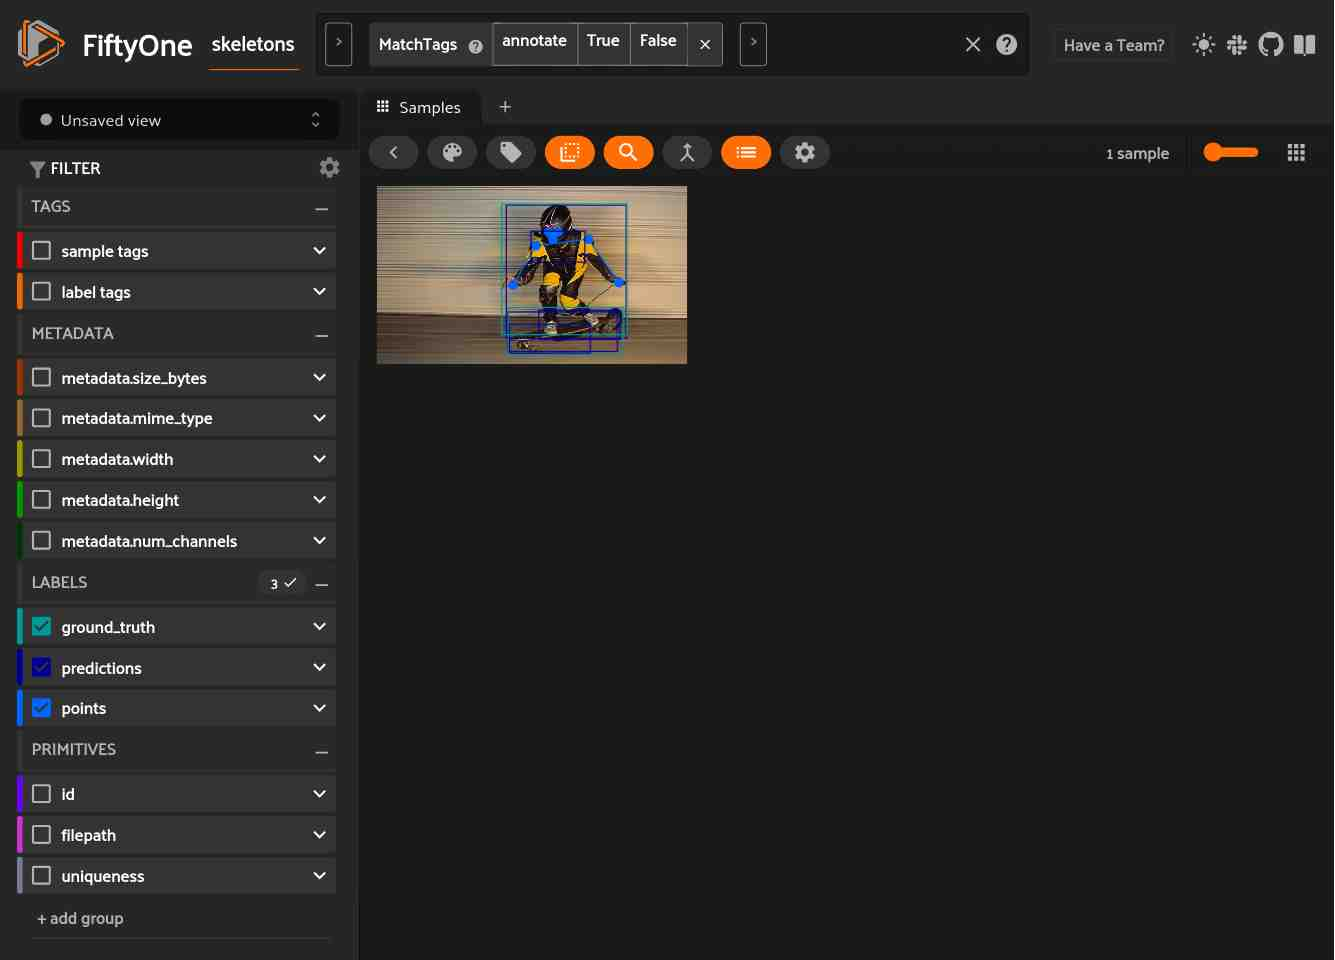

In [18]:
ann_view.load_annotations("skeleton1", cleanup=True)

session.view = ann_view

In [26]:
sample = ann_view.first()
sample["points"]

<Keypoints: {
    'keypoints': [
        <Keypoint: {
            'id': '64ff6db3aaac0f25c4c2cf08',
            'attributes': {},
            'tags': [],
            'label': 'person',
            'points': [
                [0.4328765869140625, 0.5454540616485014],
                [0.4604306357726472, 0.5254333503564652],
                [0.49028138376772573, 0.4753796962041641],
                [0.5166878146864491, 0.3672638032351937],
                [0.5947590017505007, 0.3512466339064574],
                [0.5752412049844878, 0.2791693719271438],
                [0.5878703675977903, 0.15303416346334506],
                [0.6705339774303155, 0.32722087991335286],
                [0.7095695709623413, 0.41131101888921867],
                [0.7313835791125911, 0.45535823454324365],
                [0.7784559124894457, 0.5274354965225572],
                [0.6073881643638032, 0.4453475037127834],
                [0.6567567091248947, 0.5054118886955448],
                [0.6326464895904

In [29]:
new_point = fo.Keypoint(
    label="person",
    points=[[.25,.25],[.5,.5],[.75,.75]]
)
sample["points"]

<Keypoints: {
    'keypoints': [
        <Keypoint: {
            'id': '64ff6db3aaac0f25c4c2cf08',
            'attributes': {},
            'tags': [],
            'label': 'person',
            'points': [
                [0.4328765869140625, 0.5454540616485014],
                [0.4604306357726472, 0.5254333503564652],
                [0.49028138376772573, 0.4753796962041641],
                [0.5166878146864491, 0.3672638032351937],
                [0.5947590017505007, 0.3512466339064574],
                [0.5752412049844878, 0.2791693719271438],
                [0.5878703675977903, 0.15303416346334506],
                [0.6705339774303155, 0.32722087991335286],
                [0.7095695709623413, 0.41131101888921867],
                [0.7313835791125911, 0.45535823454324365],
                [0.7784559124894457, 0.5274354965225572],
                [0.6073881643638032, 0.4453475037127834],
                [0.6567567091248947, 0.5054118886955448],
                [0.6326464895904

In [41]:

dataset = fo.Dataset()

# Set keypoint skeleton for the `ground_truth` field
dataset.skeletons = {
    "points": fo.KeypointSkeleton(
        labels=[
            "left hand" "left shoulder", "right shoulder", "right hand",
            "left eye", "right eye", "mouth",
        ],
        edges=[[0, 1, 2, 3], [4, 5, 6]],
    )
}

dataset.save()

In [42]:
dataset.add_sample(sample)

'64ff719aaaac0f25c4c2cf35'


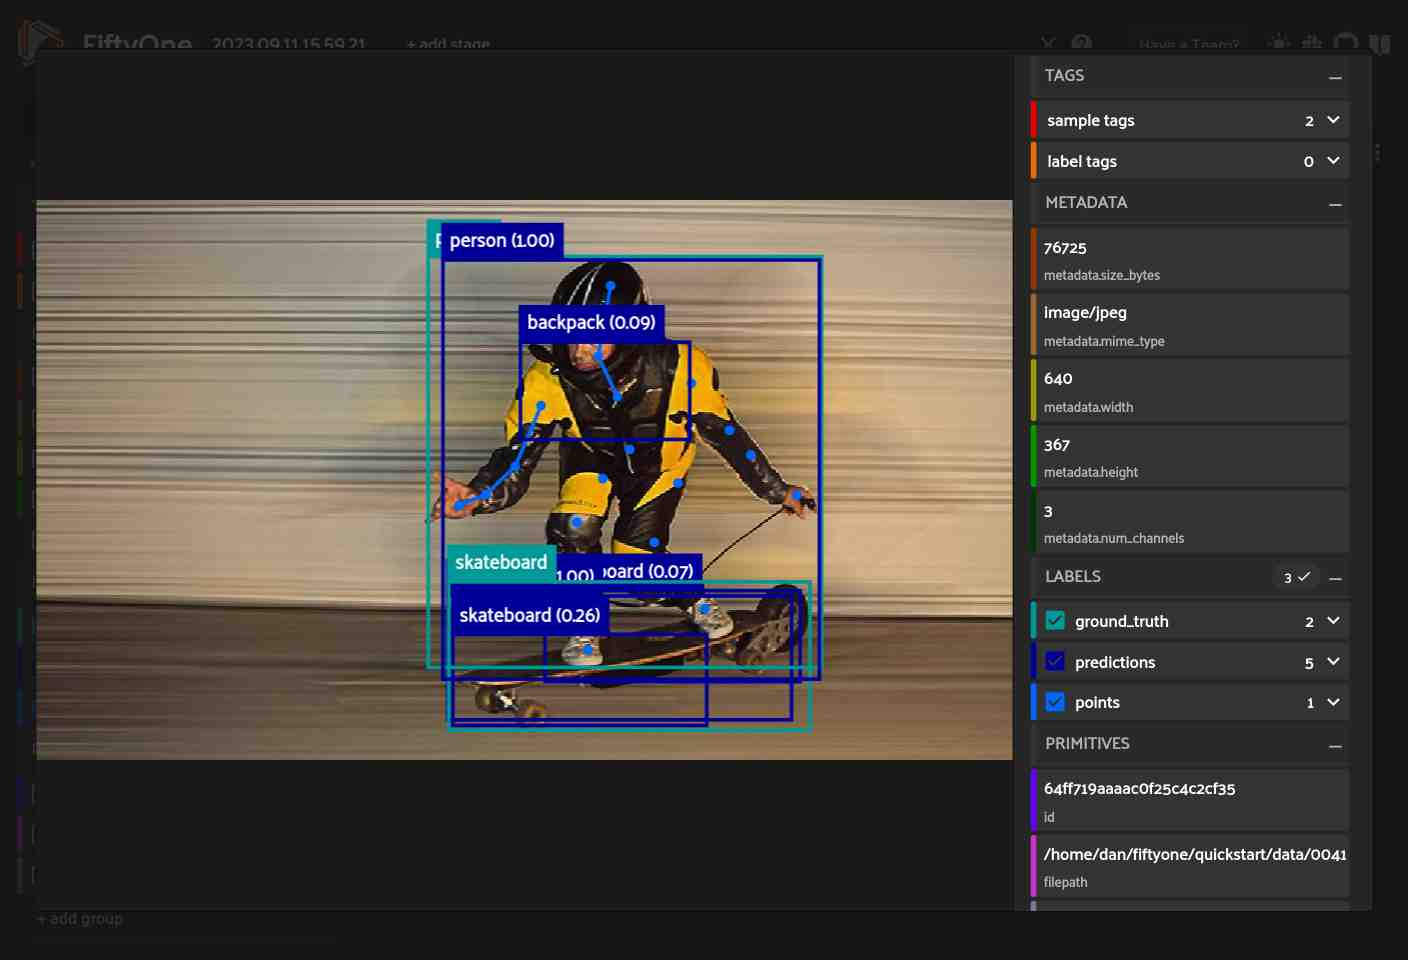

In [43]:
session.view = dataset.view()

In [34]:
sample = dataset.first()
sample

<Sample: {
    'id': '64ff705aaaac0f25c4c2cf17',
    'media_type': 'image',
    'filepath': '/home/dan/fiftyone/quickstart/data/004126.jpg',
    'tags': ['validation', 'annotate'],
    'metadata': <ImageMetadata: {
        'size_bytes': 76725,
        'mime_type': 'image/jpeg',
        'width': 640,
        'height': 367,
        'num_channels': 3,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '64ff705aaaac0f25c4c2cf0f',
                'attributes': {},
                'tags': [],
                'label': 'person',
                'bounding_box': [
                    0.40128125,
                    0.10084468664850135,
                    0.4025625,
                    0.7338147138964578,
                ],
                'mask': None,
                'confidence': None,
                'index': None,
                'area': 25741.941399999996,
                'iscrowd': 0.0,
            }>,
            <Detection:

In [20]:
dataset

Name:        skeletons
Media type:  image
Num samples: 100
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    points:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Keypoints)

In [21]:
print(len(dataset))
del_view = dataset.match_tags("annotate")
dataset.delete_samples(del_view)
print(len(dataset))

100
99
